In [2]:
#Variance Inflation Factor
#VIF usaed to over come the Multicolinearity

In [3]:
import pandas as ps

In [4]:
data=ps.read_csv("Preplacement.csv")

In [5]:
data

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [6]:
data.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [7]:
data.drop('sl_no',inplace=True,axis=1)

In [8]:
data.select_dtypes(include="number").cov()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,60.348373,42.897137,37.659225,24.535952,1.976764e+04
hsc_p,60.348373,118.755706,34.819820,35.461678,22.555846,4.600806e+04
degree_p,42.897137,34.819820,54.151103,21.929469,17.272020,-8.064357e+03
etest_p,37.659225,35.461678,21.929469,176.251018,16.886973,1.571579e+05
mba_p,24.535952,22.555846,17.272020,16.886973,34.028376,6.611551e+04
salary,19767.643976,46008.057275,-8064.357161,157157.850783,66115.509283,5.999726e+09


In [9]:
data.select_dtypes(include="number").corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [10]:
import seaborn as sns

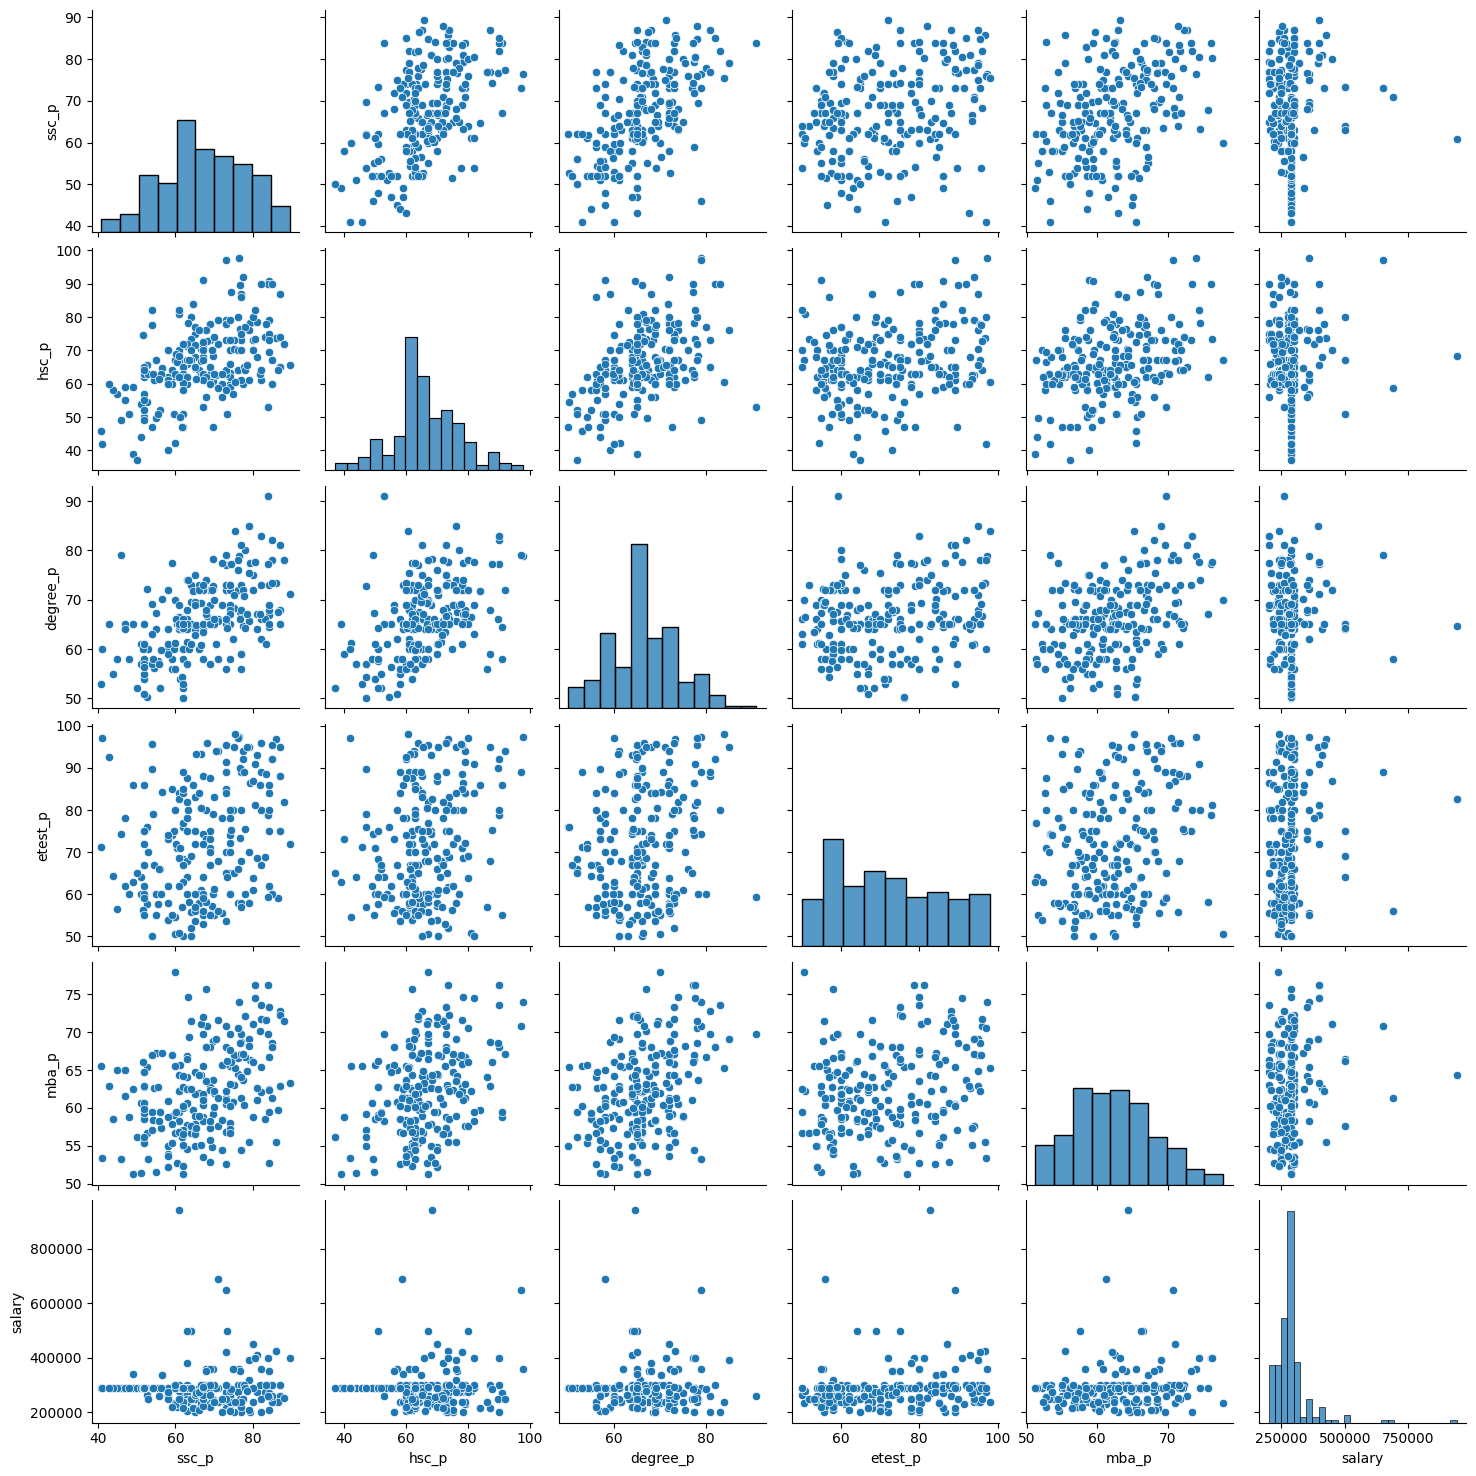

In [11]:
sns.pairplot(data)

In [12]:
#Salary with all cloumns are zero correlation
#ssc_p with mba_p and ssc_p with degree_p, ssc_p with hsc_p, hsc_p with degree_p, degree_p with mba_p these all cloumns are positive's correlation.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):

    #Calculating VIF
    vif=ps.DataFrame()
    vif["variable"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

    return vif

In [14]:
cal_vif(data[["etest_p","salary"]])

,variable,VIF
0,etest_p,11.944567
1,salary,11.944567


In [15]:
#we got more then 5 value in all cloumns so we delete most value no column then we can see the changes.
#If the value was between 1 and 5 means it moderately correlated
#value was 1 not correlated
#Greater then 5 means highly correlated

In [23]:
ds=data[["ssc_p","hsc_p","degree_p","etest_p","mba_p","salary"]]
ds

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,79.33,78.33,77.48,86.5,66.28,200000.000000
2,65.00,68.00,64.00,75.0,57.80,250000.000000
3,56.00,52.00,52.00,66.0,59.43,288655.405405
4,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000
211,58.00,60.00,72.00,74.0,53.62,275000.000000
212,67.00,67.00,73.00,59.0,69.72,295000.000000
213,74.00,66.00,58.00,70.0,60.23,204000.000000


In [ ]:
## handline the multicollinearity 
#1) using VIF check the scores and remove the correlated variable 
#2) Use Regularization (Ridge or Lasso Regression) 
#3) Standardizing Variables (StandardScaler preprocessing method which is usage in ML) 
#4) Increase Sample Size

In [19]:
from sklearn.preprocessing import StandardScaler
Stand=StandardScaler()
#fit_transform (fit learn the patten in model fit.transform learn and give the value)
St_data=Stand.fit_transform(ds)

In [28]:
#Store the preprocessing StandardScaler data in table format 
Scaler=ps.DataFrame(St_data, columns=ds.columns)

In [26]:
Scaler

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,-0.028087,2.268812,-1.140102,-1.291091,-0.597647,-2.414078e-01
1,1.113369,1.103448,1.513267,1.087157,0.687620,-1.147234e+00
2,-0.213238,0.153313,-0.322843,0.218908,-0.769474,-5.002152e-01
3,-1.046417,-1.318339,-1.957362,-0.460592,-0.489396,-7.532285e-16
4,1.712332,0.668391,0.943909,1.864806,-1.164676,1.764349e+00
...,...,...,...,...,...,...
210,1.230940,1.441008,1.529612,1.426906,2.098321,1.440840e+00
211,-0.861266,-0.582513,0.766836,0.143408,-1.487711,-1.767060e-01
212,-0.028087,0.061335,0.903046,-0.989091,1.278706,8.210139e-02
213,0.619941,-0.030644,-1.140102,-0.158592,-0.351934,-1.095472e+00


In [27]:
cal_vif(Scaler)

,variable,VIF
0,ssc_p,1.686682
1,hsc_p,1.471245
2,degree_p,1.566925
3,etest_p,1.131043
4,mba_p,1.323305
5,salary,1.049921


In [ ]:
#All varibale data was less then 5 so it moderately correlated